In [1]:
from load_data import CholeskyStockDataset

zip_path = "../../data/Data_Cleaned.zip"
data_path = "../../data/Data_60min_cleaned"
N_FIRST_STOCKS = 30
TIME_STEPS = 7
PREDICTION_HORIZON = 1
ALPHA = 0.1

dataset = CholeskyStockDataset(
    zip_path,
    data_path,
    sequence_length=TIME_STEPS,
    prediction_horizon=PREDICTION_HORIZON,
    n_first_stocks=N_FIRST_STOCKS,
)

sample_item = dataset[0]
cholesky_vector_size = sample_item[1].shape[1]
print(f"\nLength of dataset:                  {len(dataset)}")
print(f"Shape of eod_data_batch:            {sample_item[0].shape}")
print(f"Shape of cholesky_vectors_batch:    {sample_item[1].shape}")
print(f"Shape of mask_batch:                {sample_item[2].shape}")
print(f"Shape of base_batch:                {sample_item[3].shape}")
print(f"Shape of ground_truth_batch:        {sample_item[4].shape}")

Successfully loaded AAPL with 14084 rows
Successfully loaded AMGN with 14084 rows
Successfully loaded AXP with 14084 rows
Successfully loaded BA with 14084 rows
Successfully loaded CAT with 14084 rows
Successfully loaded CRM with 14084 rows
Successfully loaded CSCO with 14084 rows
Successfully loaded CVX with 14084 rows
Successfully loaded DIA with 14084 rows
Successfully loaded DIS with 14084 rows
Successfully loaded GS with 14084 rows
Successfully loaded HD with 14084 rows
Successfully loaded HON with 14084 rows
Successfully loaded IBM with 14084 rows
Successfully loaded INTC with 14084 rows
Successfully loaded JNJ with 14084 rows
Successfully loaded JPM with 14084 rows
Successfully loaded KO with 14084 rows
Successfully loaded MCD with 14084 rows
Successfully loaded MMM with 14084 rows
Successfully loaded MRK with 14084 rows
Successfully loaded MSFT with 14084 rows
Successfully loaded NKE with 14084 rows
Successfully loaded PG with 14084 rows
Successfully loaded TRV with 14084 rows


In [2]:
from load_data import create_dataloaders

train_loader, valid_loader, test_loader = create_dataloaders(
    dataset,
    train_ratio=0.8,
    valid_ratio=0.1,
    test_ratio=0.1,
    batch_size=1
)

sample_batch = next(iter(train_loader))
eod_data_batch, cholesky_vectors_batch, mask_batch, base_batch, ground_truth_batch = sample_batch

print(f"\nSample batch shapes:")
print(f"Shape of eod_data_batch:            {eod_data_batch.shape}")
print(f"Shape of cholesky_vectors_batch:    {cholesky_vectors_batch.shape}")
print(f"Shape of mask_batch:                {mask_batch.shape}")
print(f"Shape of base_batch:                {base_batch.shape}")
print(f"Shape of ground_truth_batch:        {ground_truth_batch.shape}")



Sample batch shapes:
Shape of eod_data_batch:            torch.Size([1, 30, 7, 4])
Shape of cholesky_vectors_batch:    torch.Size([1, 7, 465])
Shape of mask_batch:                torch.Size([1, 30])
Shape of base_batch:                torch.Size([1, 30])
Shape of ground_truth_batch:        torch.Size([1, 30])


In [3]:
from train import train, test_model
from model import CholeskyStockMixer
from torch.optim import Adam

model = CholeskyStockMixer(
    stocks=N_FIRST_STOCKS,
    time_steps=TIME_STEPS,
    channels=4,
    market=20,
    scale_dim=3,
    cholesky_hidden_size=465,
    cholesky_vector_size=cholesky_vector_size,
    lstm_model_path="../../src/LSTM/model/cholesky_lstm_model_eliot.pth",
    # dropout_rate=0.2
)
history = train(
    model,
    epochs=100,
    stock_num=N_FIRST_STOCKS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=Adam(model.parameters(), lr=0.001),
    alpha=0.1
)

{'input_size': 465, 'hidden_size': 465, 'n_assets': 30, 'sequence_length': 7, 'learning_rate': 1e-05, 'lambda_penalty': 5e-07}
Loading trained CholeskyLSTM with hyperparameters:
Input size:     465
Hidden size:    465
N_assets:       30


/home/ryounis/Documents/Zurich/ETHZ/MA3/DeepL/DL_2024/LSTM_Stockmixer/src/model.py:31: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_info = torch.load(lstm_model_path)

Epoch 1/100:


Training: 100%|██████████| 11260/11260 [04:00<00:00, 46.85it/s]


Training Loss:   2.2223e-03, Regularization Loss: 2.2153e-03, Ranking Loss: 6.9794e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 132.34it/s]
/home/ryounis/Documents/Zurich/ETHZ/MA3/DeepL/DL_2024/.venv/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/ryounis/Documents/Zurich/ETHZ/MA3/DeepL/DL_2024/.venv/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Validation Loss: 2.0566e-03, Regularization Loss: 2.0480e-03, Ranking Loss: 8.5893e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 130.20it/s]


Test Loss:       2.1360e-03, Regularization Loss: 2.1280e-03, Ranking Loss: 8.0068e-05

Epoch 2/100:


Training: 100%|██████████| 11260/11260 [04:08<00:00, 45.39it/s]


Training Loss:   3.6251e-04, Regularization Loss: 3.5696e-04, Ranking Loss: 5.5425e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 129.83it/s]


Validation Loss: 2.5745e-04, Regularization Loss: 2.5195e-04, Ranking Loss: 5.5034e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 129.81it/s]


Test Loss:       2.3514e-04, Regularization Loss: 2.3028e-04, Ranking Loss: 4.8603e-05

Epoch 3/100:


Training: 100%|██████████| 11260/11260 [04:08<00:00, 45.23it/s]


Training Loss:   3.1096e-04, Regularization Loss: 3.0570e-04, Ranking Loss: 5.2579e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 130.57it/s]


Validation Loss: 2.4619e-04, Regularization Loss: 2.4056e-04, Ranking Loss: 5.6300e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 130.78it/s]


Test Loss:       2.1852e-04, Regularization Loss: 2.1376e-04, Ranking Loss: 4.7618e-05

Epoch 4/100:


Training: 100%|██████████| 11260/11260 [03:58<00:00, 47.12it/s]


Training Loss:   3.0518e-04, Regularization Loss: 3.0003e-04, Ranking Loss: 5.1442e-05


Validation: 100%|██████████| 1407/1407 [00:09<00:00, 143.16it/s]


Validation Loss: 2.2483e-04, Regularization Loss: 2.1931e-04, Ranking Loss: 5.5253e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 139.97it/s]


Test Loss:       1.9967e-04, Regularization Loss: 1.9496e-04, Ranking Loss: 4.7098e-05

Epoch 5/100:


Training: 100%|██████████| 11260/11260 [03:52<00:00, 48.45it/s]


Training Loss:   2.9411e-04, Regularization Loss: 2.8900e-04, Ranking Loss: 5.1016e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 136.22it/s]


Validation Loss: 2.2160e-04, Regularization Loss: 2.1604e-04, Ranking Loss: 5.5578e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 140.18it/s]


Test Loss:       1.9614e-04, Regularization Loss: 1.9144e-04, Ranking Loss: 4.6984e-05

Epoch 6/100:


Training: 100%|██████████| 11260/11260 [03:52<00:00, 48.38it/s]


Training Loss:   2.9036e-04, Regularization Loss: 2.8529e-04, Ranking Loss: 5.0740e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 134.25it/s]


Validation Loss: 2.1802e-04, Regularization Loss: 2.1249e-04, Ranking Loss: 5.5297e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 135.22it/s]


Test Loss:       1.9267e-04, Regularization Loss: 1.8800e-04, Ranking Loss: 4.6633e-05

Epoch 7/100:


Training: 100%|██████████| 11260/11260 [04:04<00:00, 46.01it/s]


Training Loss:   2.8834e-04, Regularization Loss: 2.8326e-04, Ranking Loss: 5.0779e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 132.04it/s]


Validation Loss: 2.1949e-04, Regularization Loss: 2.1394e-04, Ranking Loss: 5.5507e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 135.51it/s]


Test Loss:       1.9204e-04, Regularization Loss: 1.8738e-04, Ranking Loss: 4.6652e-05

Epoch 8/100:


Training: 100%|██████████| 11260/11260 [04:02<00:00, 46.52it/s]


Training Loss:   2.8452e-04, Regularization Loss: 2.7946e-04, Ranking Loss: 5.0528e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 134.60it/s]


Validation Loss: 2.1481e-04, Regularization Loss: 2.0931e-04, Ranking Loss: 5.5031e-05


Testing: 100%|██████████| 1409/1409 [00:11<00:00, 125.55it/s]


Test Loss:       1.8753e-04, Regularization Loss: 1.8292e-04, Ranking Loss: 4.6113e-05

Epoch 9/100:


Training: 100%|██████████| 11260/11260 [04:02<00:00, 46.46it/s]


Training Loss:   2.8360e-04, Regularization Loss: 2.7853e-04, Ranking Loss: 5.0640e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 133.90it/s]


Validation Loss: 2.1430e-04, Regularization Loss: 2.0878e-04, Ranking Loss: 5.5245e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 135.71it/s]


Test Loss:       1.8647e-04, Regularization Loss: 1.8185e-04, Ranking Loss: 4.6139e-05

Epoch 10/100:


Training: 100%|██████████| 11260/11260 [04:01<00:00, 46.54it/s]


Training Loss:   2.7991e-04, Regularization Loss: 2.7488e-04, Ranking Loss: 5.0365e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 134.78it/s]


Validation Loss: 2.1247e-04, Regularization Loss: 2.0695e-04, Ranking Loss: 5.5136e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 133.56it/s]


Test Loss:       1.8436e-04, Regularization Loss: 1.7977e-04, Ranking Loss: 4.5958e-05

Epoch 11/100:


Training: 100%|██████████| 11260/11260 [04:01<00:00, 46.54it/s]


Training Loss:   2.7787e-04, Regularization Loss: 2.7283e-04, Ranking Loss: 5.0376e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 135.04it/s]


Validation Loss: 2.1173e-04, Regularization Loss: 2.0619e-04, Ranking Loss: 5.5364e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 133.28it/s]


Test Loss:       1.8304e-04, Regularization Loss: 1.7845e-04, Ranking Loss: 4.5888e-05

Epoch 12/100:


Training: 100%|██████████| 11260/11260 [04:02<00:00, 46.41it/s]


Training Loss:   2.7637e-04, Regularization Loss: 2.7134e-04, Ranking Loss: 5.0310e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 131.36it/s]


Validation Loss: 2.1296e-04, Regularization Loss: 2.0741e-04, Ranking Loss: 5.5443e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 133.67it/s]


Test Loss:       1.8321e-04, Regularization Loss: 1.7861e-04, Ranking Loss: 4.5970e-05

Epoch 13/100:


Training: 100%|██████████| 11260/11260 [04:03<00:00, 46.27it/s]


Training Loss:   2.7555e-04, Regularization Loss: 2.7052e-04, Ranking Loss: 5.0293e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 132.41it/s]


Validation Loss: 2.1195e-04, Regularization Loss: 2.0641e-04, Ranking Loss: 5.5414e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 133.43it/s]


Test Loss:       1.8232e-04, Regularization Loss: 1.7773e-04, Ranking Loss: 4.5861e-05

Epoch 14/100:


Training: 100%|██████████| 11260/11260 [04:02<00:00, 46.42it/s]


Training Loss:   2.7665e-04, Regularization Loss: 2.7160e-04, Ranking Loss: 5.0526e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 134.93it/s]


Validation Loss: 2.1240e-04, Regularization Loss: 2.0685e-04, Ranking Loss: 5.5469e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 131.32it/s]


Test Loss:       1.8300e-04, Regularization Loss: 1.7842e-04, Ranking Loss: 4.5814e-05

Epoch 15/100:


Training: 100%|██████████| 11260/11260 [04:02<00:00, 46.37it/s]


Training Loss:   2.7457e-04, Regularization Loss: 2.6954e-04, Ranking Loss: 5.0304e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 134.02it/s]


Validation Loss: 2.1266e-04, Regularization Loss: 2.0713e-04, Ranking Loss: 5.5297e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 134.19it/s]


Test Loss:       1.8289e-04, Regularization Loss: 1.7830e-04, Ranking Loss: 4.5829e-05

Epoch 16/100:


Training: 100%|██████████| 11260/11260 [04:01<00:00, 46.60it/s]


Training Loss:   2.7381e-04, Regularization Loss: 2.6877e-04, Ranking Loss: 5.0355e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 132.95it/s]


Validation Loss: 2.1349e-04, Regularization Loss: 2.0793e-04, Ranking Loss: 5.5631e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 133.32it/s]


Test Loss:       1.8192e-04, Regularization Loss: 1.7735e-04, Ranking Loss: 4.5685e-05

Epoch 17/100:


Training: 100%|██████████| 11260/11260 [04:01<00:00, 46.55it/s]


Training Loss:   2.7259e-04, Regularization Loss: 2.6757e-04, Ranking Loss: 5.0264e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 134.20it/s]


Validation Loss: 2.1322e-04, Regularization Loss: 2.0765e-04, Ranking Loss: 5.5639e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 134.13it/s]


Test Loss:       1.8234e-04, Regularization Loss: 1.7776e-04, Ranking Loss: 4.5781e-05

Epoch 18/100:


Training: 100%|██████████| 11260/11260 [04:01<00:00, 46.57it/s]


Training Loss:   2.7217e-04, Regularization Loss: 2.6715e-04, Ranking Loss: 5.0220e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 133.96it/s]


Validation Loss: 2.1163e-04, Regularization Loss: 2.0609e-04, Ranking Loss: 5.5448e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 132.74it/s]


Test Loss:       1.8147e-04, Regularization Loss: 1.7690e-04, Ranking Loss: 4.5702e-05

Epoch 19/100:


Training: 100%|██████████| 11260/11260 [04:01<00:00, 46.57it/s]


Training Loss:   2.7152e-04, Regularization Loss: 2.6649e-04, Ranking Loss: 5.0225e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 134.32it/s]


Validation Loss: 2.0852e-04, Regularization Loss: 2.0301e-04, Ranking Loss: 5.5136e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 133.71it/s]


Test Loss:       1.7939e-04, Regularization Loss: 1.7485e-04, Ranking Loss: 4.5475e-05

Epoch 20/100:


Training: 100%|██████████| 11260/11260 [04:02<00:00, 46.48it/s]


Training Loss:   2.7082e-04, Regularization Loss: 2.6581e-04, Ranking Loss: 5.0186e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 133.94it/s]


Validation Loss: 2.1111e-04, Regularization Loss: 2.0555e-04, Ranking Loss: 5.5677e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 133.62it/s]


Test Loss:       1.8099e-04, Regularization Loss: 1.7643e-04, Ranking Loss: 4.5576e-05

Epoch 21/100:


Training: 100%|██████████| 11260/11260 [04:02<00:00, 46.43it/s]


Training Loss:   2.7001e-04, Regularization Loss: 2.6499e-04, Ranking Loss: 5.0159e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 130.51it/s]


Validation Loss: 2.0932e-04, Regularization Loss: 2.0379e-04, Ranking Loss: 5.5316e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 135.31it/s]


Test Loss:       1.7868e-04, Regularization Loss: 1.7415e-04, Ranking Loss: 4.5314e-05

Epoch 22/100:


Training: 100%|██████████| 11260/11260 [04:01<00:00, 46.59it/s]


Training Loss:   2.6880e-04, Regularization Loss: 2.6378e-04, Ranking Loss: 5.0154e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 132.72it/s]


Validation Loss: 2.0640e-04, Regularization Loss: 2.0089e-04, Ranking Loss: 5.5082e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 135.14it/s]


Test Loss:       1.7646e-04, Regularization Loss: 1.7196e-04, Ranking Loss: 4.5062e-05

Epoch 23/100:


Training: 100%|██████████| 11260/11260 [04:01<00:00, 46.64it/s]


Training Loss:   2.6817e-04, Regularization Loss: 2.6316e-04, Ranking Loss: 5.0123e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 134.18it/s]


Validation Loss: 2.0522e-04, Regularization Loss: 1.9974e-04, Ranking Loss: 5.4860e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 134.15it/s]


Test Loss:       1.7639e-04, Regularization Loss: 1.7188e-04, Ranking Loss: 4.5165e-05

Epoch 24/100:


Training: 100%|██████████| 11260/11260 [04:01<00:00, 46.60it/s]


Training Loss:   2.6716e-04, Regularization Loss: 2.6215e-04, Ranking Loss: 5.0046e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 132.74it/s]


Validation Loss: 2.0476e-04, Regularization Loss: 1.9928e-04, Ranking Loss: 5.4846e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 133.90it/s]


Test Loss:       1.7625e-04, Regularization Loss: 1.7173e-04, Ranking Loss: 4.5190e-05

Epoch 25/100:


Training: 100%|██████████| 11260/11260 [04:03<00:00, 46.23it/s]


Training Loss:   2.6714e-04, Regularization Loss: 2.6214e-04, Ranking Loss: 5.0036e-05


Validation: 100%|██████████| 1407/1407 [00:11<00:00, 126.32it/s]


Validation Loss: 2.0384e-04, Regularization Loss: 1.9838e-04, Ranking Loss: 5.4604e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 128.27it/s]


Test Loss:       1.7529e-04, Regularization Loss: 1.7080e-04, Ranking Loss: 4.4946e-05

Epoch 26/100:


Training: 100%|██████████| 11260/11260 [04:08<00:00, 45.32it/s]


Training Loss:   2.6870e-04, Regularization Loss: 2.6367e-04, Ranking Loss: 5.0308e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 134.04it/s]


Validation Loss: 2.0133e-04, Regularization Loss: 1.9589e-04, Ranking Loss: 5.4399e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 133.68it/s]


Test Loss:       1.7639e-04, Regularization Loss: 1.7190e-04, Ranking Loss: 4.4869e-05

Epoch 27/100:


Training: 100%|██████████| 11260/11260 [04:05<00:00, 45.80it/s]


Training Loss:   2.6776e-04, Regularization Loss: 2.6275e-04, Ranking Loss: 5.0146e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 132.27it/s]


Validation Loss: 2.0514e-04, Regularization Loss: 1.9967e-04, Ranking Loss: 5.4688e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 132.61it/s]


Test Loss:       1.7624e-04, Regularization Loss: 1.7175e-04, Ranking Loss: 4.4983e-05

Epoch 28/100:


Training: 100%|██████████| 11260/11260 [04:06<00:00, 45.60it/s]


Training Loss:   2.6620e-04, Regularization Loss: 2.6120e-04, Ranking Loss: 5.0048e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 130.27it/s]


Validation Loss: 2.0319e-04, Regularization Loss: 1.9772e-04, Ranking Loss: 5.4608e-05


Testing: 100%|██████████| 1409/1409 [00:11<00:00, 125.75it/s]


Test Loss:       1.7434e-04, Regularization Loss: 1.6985e-04, Ranking Loss: 4.4854e-05

Epoch 29/100:


Training: 100%|██████████| 11260/11260 [04:08<00:00, 45.36it/s]


Training Loss:   2.6594e-04, Regularization Loss: 2.6093e-04, Ranking Loss: 5.0070e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 130.92it/s]


Validation Loss: 2.0435e-04, Regularization Loss: 1.9885e-04, Ranking Loss: 5.4928e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 128.49it/s]


Test Loss:       1.7578e-04, Regularization Loss: 1.7128e-04, Ranking Loss: 4.4946e-05

Epoch 30/100:


Training: 100%|██████████| 11260/11260 [03:56<00:00, 47.71it/s]


Training Loss:   2.6607e-04, Regularization Loss: 2.6107e-04, Ranking Loss: 5.0062e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 137.75it/s]


Validation Loss: 2.0421e-04, Regularization Loss: 1.9873e-04, Ranking Loss: 5.4824e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 139.07it/s]


Test Loss:       1.7606e-04, Regularization Loss: 1.7157e-04, Ranking Loss: 4.4975e-05

Epoch 31/100:


Training: 100%|██████████| 11260/11260 [04:09<00:00, 45.11it/s]


Training Loss:   2.6536e-04, Regularization Loss: 2.6036e-04, Ranking Loss: 5.0006e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 131.45it/s]


Validation Loss: 2.0349e-04, Regularization Loss: 1.9800e-04, Ranking Loss: 5.4910e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 129.02it/s]


Test Loss:       1.7533e-04, Regularization Loss: 1.7083e-04, Ranking Loss: 4.4928e-05

Epoch 32/100:


Training: 100%|██████████| 11260/11260 [04:06<00:00, 45.62it/s]


Training Loss:   2.6511e-04, Regularization Loss: 2.6011e-04, Ranking Loss: 5.0011e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 132.77it/s]


Validation Loss: 2.0294e-04, Regularization Loss: 1.9745e-04, Ranking Loss: 5.4861e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 133.38it/s]


Test Loss:       1.7610e-04, Regularization Loss: 1.7161e-04, Ranking Loss: 4.4876e-05

Epoch 33/100:


Training: 100%|██████████| 11260/11260 [04:07<00:00, 45.51it/s]


Training Loss:   2.6443e-04, Regularization Loss: 2.5943e-04, Ranking Loss: 5.0017e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 130.59it/s]


Validation Loss: 2.0271e-04, Regularization Loss: 1.9721e-04, Ranking Loss: 5.4980e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 130.43it/s]


Test Loss:       1.7626e-04, Regularization Loss: 1.7176e-04, Ranking Loss: 4.5059e-05

Epoch 34/100:


Training: 100%|██████████| 11260/11260 [04:07<00:00, 45.49it/s]


Training Loss:   2.6403e-04, Regularization Loss: 2.5903e-04, Ranking Loss: 4.9996e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 133.69it/s]


Validation Loss: 2.0187e-04, Regularization Loss: 1.9639e-04, Ranking Loss: 5.4822e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 137.95it/s]


Test Loss:       1.7465e-04, Regularization Loss: 1.7016e-04, Ranking Loss: 4.4833e-05

Epoch 35/100:


Training: 100%|██████████| 11260/11260 [03:56<00:00, 47.61it/s]


Training Loss:   2.6333e-04, Regularization Loss: 2.5832e-04, Ranking Loss: 5.0021e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 136.86it/s]


Validation Loss: 2.0015e-04, Regularization Loss: 1.9471e-04, Ranking Loss: 5.4402e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 137.02it/s]


Test Loss:       1.7393e-04, Regularization Loss: 1.6947e-04, Ranking Loss: 4.4679e-05

Epoch 36/100:


Training: 100%|██████████| 11260/11260 [03:55<00:00, 47.76it/s]


Training Loss:   2.6325e-04, Regularization Loss: 2.5825e-04, Ranking Loss: 4.9983e-05


Validation: 100%|██████████| 1407/1407 [00:11<00:00, 127.47it/s]


Validation Loss: 1.9854e-04, Regularization Loss: 1.9312e-04, Ranking Loss: 5.4193e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 129.28it/s]


Test Loss:       1.7291e-04, Regularization Loss: 1.6844e-04, Ranking Loss: 4.4692e-05

Epoch 37/100:


Training: 100%|██████████| 11260/11260 [04:14<00:00, 44.28it/s]


Training Loss:   2.6327e-04, Regularization Loss: 2.5827e-04, Ranking Loss: 4.9983e-05


Validation: 100%|██████████| 1407/1407 [00:11<00:00, 124.81it/s]


Validation Loss: 1.9970e-04, Regularization Loss: 1.9426e-04, Ranking Loss: 5.4434e-05


Testing: 100%|██████████| 1409/1409 [00:11<00:00, 123.16it/s]


Test Loss:       1.7405e-04, Regularization Loss: 1.6958e-04, Ranking Loss: 4.4709e-05

Epoch 38/100:


Training: 100%|██████████| 11260/11260 [04:17<00:00, 43.69it/s]


Training Loss:   2.6304e-04, Regularization Loss: 2.5805e-04, Ranking Loss: 4.9942e-05


Validation: 100%|██████████| 1407/1407 [00:12<00:00, 115.33it/s]


Validation Loss: 1.9807e-04, Regularization Loss: 1.9267e-04, Ranking Loss: 5.3952e-05


Testing: 100%|██████████| 1409/1409 [00:11<00:00, 121.21it/s]


Test Loss:       1.7167e-04, Regularization Loss: 1.6722e-04, Ranking Loss: 4.4430e-05

Epoch 39/100:


Training: 100%|██████████| 11260/11260 [04:27<00:00, 42.07it/s]


Training Loss:   2.6190e-04, Regularization Loss: 2.5690e-04, Ranking Loss: 4.9960e-05


Validation: 100%|██████████| 1407/1407 [00:11<00:00, 122.92it/s]


Validation Loss: 1.9942e-04, Regularization Loss: 1.9397e-04, Ranking Loss: 5.4473e-05


Testing: 100%|██████████| 1409/1409 [00:11<00:00, 121.46it/s]


Test Loss:       1.7391e-04, Regularization Loss: 1.6944e-04, Ranking Loss: 4.4733e-05

Epoch 40/100:


Training: 100%|██████████| 11260/11260 [04:12<00:00, 44.57it/s]


Training Loss:   2.6134e-04, Regularization Loss: 2.5634e-04, Ranking Loss: 4.9975e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 128.31it/s]


Validation Loss: 1.9883e-04, Regularization Loss: 1.9340e-04, Ranking Loss: 5.4328e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 132.36it/s]


Test Loss:       1.7372e-04, Regularization Loss: 1.6926e-04, Ranking Loss: 4.4683e-05

Epoch 41/100:


Training: 100%|██████████| 11260/11260 [04:07<00:00, 45.47it/s]


Training Loss:   2.6130e-04, Regularization Loss: 2.5632e-04, Ranking Loss: 4.9886e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 130.20it/s]


Validation Loss: 1.9696e-04, Regularization Loss: 1.9154e-04, Ranking Loss: 5.4186e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 133.18it/s]


Test Loss:       1.7214e-04, Regularization Loss: 1.6768e-04, Ranking Loss: 4.4636e-05

Epoch 42/100:


Training: 100%|██████████| 11260/11260 [04:08<00:00, 45.34it/s]


Training Loss:   2.6106e-04, Regularization Loss: 2.5607e-04, Ranking Loss: 4.9909e-05


Validation: 100%|██████████| 1407/1407 [00:11<00:00, 127.09it/s]


Validation Loss: 1.9524e-04, Regularization Loss: 1.8985e-04, Ranking Loss: 5.3917e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 130.62it/s]


Test Loss:       1.7168e-04, Regularization Loss: 1.6722e-04, Ranking Loss: 4.4625e-05

Epoch 43/100:


Training: 100%|██████████| 11260/11260 [04:08<00:00, 45.40it/s]


Training Loss:   2.6109e-04, Regularization Loss: 2.5610e-04, Ranking Loss: 4.9895e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 130.93it/s]


Validation Loss: 1.9621e-04, Regularization Loss: 1.9082e-04, Ranking Loss: 5.3915e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 132.34it/s]


Test Loss:       1.7251e-04, Regularization Loss: 1.6804e-04, Ranking Loss: 4.4691e-05

Epoch 44/100:


Training: 100%|██████████| 11260/11260 [04:10<00:00, 44.98it/s]


Training Loss:   2.6112e-04, Regularization Loss: 2.5612e-04, Ranking Loss: 4.9939e-05


Validation: 100%|██████████| 1407/1407 [00:11<00:00, 123.91it/s]


Validation Loss: 1.9708e-04, Regularization Loss: 1.9165e-04, Ranking Loss: 5.4318e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 129.04it/s]


Test Loss:       1.7361e-04, Regularization Loss: 1.6912e-04, Ranking Loss: 4.4924e-05

Epoch 45/100:


Training: 100%|██████████| 11260/11260 [04:15<00:00, 44.10it/s]


Training Loss:   2.6071e-04, Regularization Loss: 2.5573e-04, Ranking Loss: 4.9786e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 128.41it/s]


Validation Loss: 1.9715e-04, Regularization Loss: 1.9172e-04, Ranking Loss: 5.4273e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 132.73it/s]


Test Loss:       1.7312e-04, Regularization Loss: 1.6865e-04, Ranking Loss: 4.4755e-05

Epoch 46/100:


Training: 100%|██████████| 11260/11260 [04:14<00:00, 44.31it/s]


Training Loss:   2.5995e-04, Regularization Loss: 2.5497e-04, Ranking Loss: 4.9878e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 130.92it/s]


Validation Loss: 1.9601e-04, Regularization Loss: 1.9061e-04, Ranking Loss: 5.4027e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 133.30it/s]


Test Loss:       1.7325e-04, Regularization Loss: 1.6878e-04, Ranking Loss: 4.4716e-05

Epoch 47/100:


Training: 100%|██████████| 11260/11260 [04:04<00:00, 46.06it/s]


Training Loss:   2.6074e-04, Regularization Loss: 2.5576e-04, Ranking Loss: 4.9792e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 133.83it/s]


Validation Loss: 1.9627e-04, Regularization Loss: 1.9086e-04, Ranking Loss: 5.4153e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 131.15it/s]


Test Loss:       1.7300e-04, Regularization Loss: 1.6852e-04, Ranking Loss: 4.4777e-05

Epoch 48/100:


Training: 100%|██████████| 11260/11260 [04:07<00:00, 45.48it/s]


Training Loss:   2.6254e-04, Regularization Loss: 2.5754e-04, Ranking Loss: 5.0062e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 129.03it/s]


Validation Loss: 1.9964e-04, Regularization Loss: 1.9415e-04, Ranking Loss: 5.4805e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 130.31it/s]


Test Loss:       1.7532e-04, Regularization Loss: 1.7080e-04, Ranking Loss: 4.5163e-05

Epoch 49/100:


Training: 100%|██████████| 11260/11260 [04:10<00:00, 44.98it/s]


Training Loss:   2.5965e-04, Regularization Loss: 2.5464e-04, Ranking Loss: 5.0043e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 128.16it/s]


Validation Loss: 2.0008e-04, Regularization Loss: 1.9463e-04, Ranking Loss: 5.4465e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 128.83it/s]


Test Loss:       1.7687e-04, Regularization Loss: 1.7236e-04, Ranking Loss: 4.5047e-05

Epoch 50/100:


Training: 100%|██████████| 11260/11260 [04:21<00:00, 43.06it/s]


Training Loss:   2.5968e-04, Regularization Loss: 2.5469e-04, Ranking Loss: 4.9883e-05


Validation: 100%|██████████| 1407/1407 [00:11<00:00, 125.10it/s]


Validation Loss: 1.9625e-04, Regularization Loss: 1.9083e-04, Ranking Loss: 5.4212e-05


Testing: 100%|██████████| 1409/1409 [00:11<00:00, 120.28it/s]


Test Loss:       1.7364e-04, Regularization Loss: 1.6917e-04, Ranking Loss: 4.4766e-05

Epoch 51/100:


Training: 100%|██████████| 11260/11260 [04:22<00:00, 42.96it/s]


Training Loss:   2.5969e-04, Regularization Loss: 2.5470e-04, Ranking Loss: 4.9860e-05


Validation: 100%|██████████| 1407/1407 [00:11<00:00, 122.78it/s]


Validation Loss: 1.9485e-04, Regularization Loss: 1.8946e-04, Ranking Loss: 5.3870e-05


Testing: 100%|██████████| 1409/1409 [00:12<00:00, 110.67it/s]


Test Loss:       1.7237e-04, Regularization Loss: 1.6792e-04, Ranking Loss: 4.4512e-05

Epoch 52/100:


Training: 100%|██████████| 11260/11260 [04:20<00:00, 43.26it/s]


Training Loss:   2.5913e-04, Regularization Loss: 2.5414e-04, Ranking Loss: 4.9873e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 130.26it/s]


Validation Loss: 1.9603e-04, Regularization Loss: 1.9062e-04, Ranking Loss: 5.4094e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 129.03it/s]


Test Loss:       1.7377e-04, Regularization Loss: 1.6929e-04, Ranking Loss: 4.4803e-05

Epoch 53/100:


Training: 100%|██████████| 11260/11260 [04:10<00:00, 44.92it/s]


Training Loss:   2.5864e-04, Regularization Loss: 2.5365e-04, Ranking Loss: 4.9870e-05


Validation: 100%|██████████| 1407/1407 [00:12<00:00, 116.09it/s]


Validation Loss: 1.9472e-04, Regularization Loss: 1.8933e-04, Ranking Loss: 5.3853e-05


Testing: 100%|██████████| 1409/1409 [00:12<00:00, 117.09it/s]


Test Loss:       1.7314e-04, Regularization Loss: 1.6868e-04, Ranking Loss: 4.4659e-05

Epoch 54/100:


Training: 100%|██████████| 11260/11260 [04:27<00:00, 42.04it/s]


Training Loss:   2.5888e-04, Regularization Loss: 2.5390e-04, Ranking Loss: 4.9846e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 138.56it/s]


Validation Loss: 1.9584e-04, Regularization Loss: 1.9044e-04, Ranking Loss: 5.4048e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 136.14it/s]


Test Loss:       1.7345e-04, Regularization Loss: 1.6898e-04, Ranking Loss: 4.4676e-05

Epoch 55/100:


Training: 100%|██████████| 11260/11260 [04:01<00:00, 46.72it/s]


Training Loss:   2.5879e-04, Regularization Loss: 2.5380e-04, Ranking Loss: 4.9902e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 133.78it/s]


Validation Loss: 1.9466e-04, Regularization Loss: 1.8930e-04, Ranking Loss: 5.3622e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 136.60it/s]


Test Loss:       1.7228e-04, Regularization Loss: 1.6782e-04, Ranking Loss: 4.4532e-05

Epoch 56/100:


Training: 100%|██████████| 11260/11260 [04:02<00:00, 46.34it/s]


Training Loss:   2.5803e-04, Regularization Loss: 2.5304e-04, Ranking Loss: 4.9903e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 135.06it/s]


Validation Loss: 1.9512e-04, Regularization Loss: 1.8973e-04, Ranking Loss: 5.3941e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 135.06it/s]


Test Loss:       1.7241e-04, Regularization Loss: 1.6795e-04, Ranking Loss: 4.4616e-05

Epoch 57/100:


Training: 100%|██████████| 11260/11260 [04:16<00:00, 43.92it/s]


Training Loss:   2.5788e-04, Regularization Loss: 2.5289e-04, Ranking Loss: 4.9882e-05


Validation: 100%|██████████| 1407/1407 [00:11<00:00, 123.20it/s]


Validation Loss: 1.9547e-04, Regularization Loss: 1.9005e-04, Ranking Loss: 5.4161e-05


Testing: 100%|██████████| 1409/1409 [00:11<00:00, 124.81it/s]


Test Loss:       1.7365e-04, Regularization Loss: 1.6918e-04, Ranking Loss: 4.4701e-05

Epoch 58/100:


Training: 100%|██████████| 11260/11260 [04:04<00:00, 45.97it/s]


Training Loss:   2.5710e-04, Regularization Loss: 2.5211e-04, Ranking Loss: 4.9863e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 133.16it/s]


Validation Loss: 1.9639e-04, Regularization Loss: 1.9098e-04, Ranking Loss: 5.4186e-05


Testing: 100%|██████████| 1409/1409 [00:11<00:00, 127.54it/s]


Test Loss:       1.7336e-04, Regularization Loss: 1.6890e-04, Ranking Loss: 4.4648e-05

Epoch 59/100:


Training: 100%|██████████| 11260/11260 [04:08<00:00, 45.38it/s]


Training Loss:   2.5771e-04, Regularization Loss: 2.5272e-04, Ranking Loss: 4.9865e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 134.51it/s]


Validation Loss: 1.9664e-04, Regularization Loss: 1.9123e-04, Ranking Loss: 5.4109e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 132.83it/s]


Test Loss:       1.7438e-04, Regularization Loss: 1.6992e-04, Ranking Loss: 4.4622e-05

Epoch 60/100:


Training: 100%|██████████| 11260/11260 [04:07<00:00, 45.45it/s]


Training Loss:   2.5712e-04, Regularization Loss: 2.5213e-04, Ranking Loss: 4.9903e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 135.28it/s]


Validation Loss: 1.9545e-04, Regularization Loss: 1.9005e-04, Ranking Loss: 5.3960e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 132.51it/s]


Test Loss:       1.7262e-04, Regularization Loss: 1.6817e-04, Ranking Loss: 4.4530e-05

Epoch 61/100:


Training: 100%|██████████| 11260/11260 [04:12<00:00, 44.62it/s]


Training Loss:   2.5737e-04, Regularization Loss: 2.5237e-04, Ranking Loss: 5.0020e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 128.96it/s]


Validation Loss: 1.9655e-04, Regularization Loss: 1.9115e-04, Ranking Loss: 5.3979e-05


Testing: 100%|██████████| 1409/1409 [00:11<00:00, 127.83it/s]


Test Loss:       1.7528e-04, Regularization Loss: 1.7082e-04, Ranking Loss: 4.4558e-05

Epoch 62/100:


Training: 100%|██████████| 11260/11260 [04:11<00:00, 44.74it/s]


Training Loss:   2.5683e-04, Regularization Loss: 2.5183e-04, Ranking Loss: 4.9981e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 128.31it/s]


Validation Loss: 1.9628e-04, Regularization Loss: 1.9087e-04, Ranking Loss: 5.4075e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 129.79it/s]


Test Loss:       1.7427e-04, Regularization Loss: 1.6981e-04, Ranking Loss: 4.4554e-05

Epoch 63/100:


Training: 100%|██████████| 11260/11260 [04:10<00:00, 44.86it/s]


Training Loss:   2.5686e-04, Regularization Loss: 2.5186e-04, Ranking Loss: 4.9977e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 128.43it/s]


Validation Loss: 1.9495e-04, Regularization Loss: 1.8957e-04, Ranking Loss: 5.3823e-05


Testing: 100%|██████████| 1409/1409 [00:11<00:00, 127.37it/s]


Test Loss:       1.7271e-04, Regularization Loss: 1.6826e-04, Ranking Loss: 4.4472e-05

Epoch 64/100:


Training: 100%|██████████| 11260/11260 [04:13<00:00, 44.48it/s]


Training Loss:   2.5611e-04, Regularization Loss: 2.5112e-04, Ranking Loss: 4.9899e-05


Validation: 100%|██████████| 1407/1407 [00:11<00:00, 123.99it/s]


Validation Loss: 1.9587e-04, Regularization Loss: 1.9046e-04, Ranking Loss: 5.4024e-05


Testing: 100%|██████████| 1409/1409 [00:11<00:00, 124.14it/s]


Test Loss:       1.7441e-04, Regularization Loss: 1.6995e-04, Ranking Loss: 4.4553e-05

Epoch 65/100:


Training: 100%|██████████| 11260/11260 [04:18<00:00, 43.48it/s]


Training Loss:   2.5650e-04, Regularization Loss: 2.5151e-04, Ranking Loss: 4.9891e-05


Validation: 100%|██████████| 1407/1407 [00:11<00:00, 125.90it/s]


Validation Loss: 1.9536e-04, Regularization Loss: 1.8996e-04, Ranking Loss: 5.4013e-05


Testing: 100%|██████████| 1409/1409 [00:11<00:00, 124.76it/s]


Test Loss:       1.7280e-04, Regularization Loss: 1.6835e-04, Ranking Loss: 4.4490e-05

Epoch 66/100:


Training: 100%|██████████| 11260/11260 [04:12<00:00, 44.52it/s]


Training Loss:   2.5559e-04, Regularization Loss: 2.5060e-04, Ranking Loss: 4.9885e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 128.82it/s]


Validation Loss: 1.9559e-04, Regularization Loss: 1.9019e-04, Ranking Loss: 5.3998e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 130.11it/s]


Test Loss:       1.7340e-04, Regularization Loss: 1.6896e-04, Ranking Loss: 4.4381e-05

Epoch 67/100:


Training: 100%|██████████| 11260/11260 [04:07<00:00, 45.47it/s]


Training Loss:   2.5512e-04, Regularization Loss: 2.5012e-04, Ranking Loss: 4.9928e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 128.49it/s]


Validation Loss: 1.9622e-04, Regularization Loss: 1.9082e-04, Ranking Loss: 5.4023e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 130.51it/s]


Test Loss:       1.7463e-04, Regularization Loss: 1.7018e-04, Ranking Loss: 4.4563e-05

Epoch 68/100:


Training: 100%|██████████| 11260/11260 [04:07<00:00, 45.46it/s]


Training Loss:   2.5536e-04, Regularization Loss: 2.5037e-04, Ranking Loss: 4.9924e-05


Validation: 100%|██████████| 1407/1407 [00:11<00:00, 127.72it/s]


Validation Loss: 1.9552e-04, Regularization Loss: 1.9011e-04, Ranking Loss: 5.4015e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 130.18it/s]


Test Loss:       1.7367e-04, Regularization Loss: 1.6922e-04, Ranking Loss: 4.4489e-05

Epoch 69/100:


Training: 100%|██████████| 11260/11260 [04:07<00:00, 45.57it/s]


Training Loss:   2.5430e-04, Regularization Loss: 2.4931e-04, Ranking Loss: 4.9901e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 132.22it/s]


Validation Loss: 1.9534e-04, Regularization Loss: 1.8996e-04, Ranking Loss: 5.3829e-05


Testing: 100%|██████████| 1409/1409 [00:11<00:00, 124.84it/s]


Test Loss:       1.7396e-04, Regularization Loss: 1.6952e-04, Ranking Loss: 4.4441e-05

Epoch 70/100:


Training: 100%|██████████| 11260/11260 [04:16<00:00, 43.88it/s]


Training Loss:   2.5435e-04, Regularization Loss: 2.4937e-04, Ranking Loss: 4.9848e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 131.17it/s]


Validation Loss: 1.9654e-04, Regularization Loss: 1.9116e-04, Ranking Loss: 5.3826e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 129.62it/s]


Test Loss:       1.7601e-04, Regularization Loss: 1.7156e-04, Ranking Loss: 4.4532e-05

Epoch 71/100:


Training: 100%|██████████| 11260/11260 [04:09<00:00, 45.22it/s]


Training Loss:   2.5450e-04, Regularization Loss: 2.4951e-04, Ranking Loss: 4.9968e-05


Validation: 100%|██████████| 1407/1407 [00:11<00:00, 126.69it/s]


Validation Loss: 1.9701e-04, Regularization Loss: 1.9163e-04, Ranking Loss: 5.3861e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 130.96it/s]


Test Loss:       1.7589e-04, Regularization Loss: 1.7145e-04, Ranking Loss: 4.4457e-05

Epoch 72/100:


Training: 100%|██████████| 11260/11260 [04:34<00:00, 41.03it/s]


Training Loss:   2.5325e-04, Regularization Loss: 2.4826e-04, Ranking Loss: 4.9917e-05


Validation: 100%|██████████| 1407/1407 [00:11<00:00, 122.88it/s]


Validation Loss: 1.9734e-04, Regularization Loss: 1.9195e-04, Ranking Loss: 5.3903e-05


Testing: 100%|██████████| 1409/1409 [00:11<00:00, 126.99it/s]


Test Loss:       1.7514e-04, Regularization Loss: 1.7069e-04, Ranking Loss: 4.4515e-05

Epoch 73/100:


Training: 100%|██████████| 11260/11260 [04:14<00:00, 44.16it/s]


Training Loss:   2.5696e-04, Regularization Loss: 2.5193e-04, Ranking Loss: 5.0234e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 129.97it/s]


Validation Loss: 1.9609e-04, Regularization Loss: 1.9077e-04, Ranking Loss: 5.3260e-05


Testing: 100%|██████████| 1409/1409 [00:11<00:00, 127.39it/s]


Test Loss:       1.7594e-04, Regularization Loss: 1.7146e-04, Ranking Loss: 4.4791e-05

Epoch 74/100:


Training: 100%|██████████| 11260/11260 [04:12<00:00, 44.58it/s]


Training Loss:   2.5346e-04, Regularization Loss: 2.4844e-04, Ranking Loss: 5.0243e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 136.10it/s]


Validation Loss: 1.9559e-04, Regularization Loss: 1.9023e-04, Ranking Loss: 5.3616e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 135.21it/s]


Test Loss:       1.7431e-04, Regularization Loss: 1.6983e-04, Ranking Loss: 4.4822e-05

Epoch 75/100:


Training: 100%|██████████| 11260/11260 [04:03<00:00, 46.18it/s]


Training Loss:   2.5077e-04, Regularization Loss: 2.4576e-04, Ranking Loss: 5.0143e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 137.70it/s]


Validation Loss: 1.9465e-04, Regularization Loss: 1.8928e-04, Ranking Loss: 5.3743e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 132.82it/s]


Test Loss:       1.7318e-04, Regularization Loss: 1.6873e-04, Ranking Loss: 4.4503e-05

Epoch 76/100:


Training: 100%|██████████| 11260/11260 [04:07<00:00, 45.51it/s]


Training Loss:   2.4814e-04, Regularization Loss: 2.4313e-04, Ranking Loss: 5.0158e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 133.46it/s]


Validation Loss: 1.9280e-04, Regularization Loss: 1.8745e-04, Ranking Loss: 5.3546e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 132.35it/s]


Test Loss:       1.7185e-04, Regularization Loss: 1.6742e-04, Ranking Loss: 4.4355e-05

Epoch 77/100:


Training: 100%|██████████| 11260/11260 [04:08<00:00, 45.24it/s]


Training Loss:   2.4770e-04, Regularization Loss: 2.4269e-04, Ranking Loss: 5.0171e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 134.36it/s]


Validation Loss: 1.9222e-04, Regularization Loss: 1.8688e-04, Ranking Loss: 5.3443e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 135.92it/s]


Test Loss:       1.7156e-04, Regularization Loss: 1.6712e-04, Ranking Loss: 4.4465e-05

Epoch 78/100:


Training: 100%|██████████| 11260/11260 [04:04<00:00, 46.01it/s]


Training Loss:   2.4713e-04, Regularization Loss: 2.4212e-04, Ranking Loss: 5.0116e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 134.31it/s]


Validation Loss: 1.9233e-04, Regularization Loss: 1.8698e-04, Ranking Loss: 5.3476e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 133.86it/s]


Test Loss:       1.7112e-04, Regularization Loss: 1.6668e-04, Ranking Loss: 4.4414e-05

Epoch 79/100:


Training: 100%|██████████| 11260/11260 [04:06<00:00, 45.61it/s]


Training Loss:   2.4757e-04, Regularization Loss: 2.4256e-04, Ranking Loss: 5.0066e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 133.54it/s]


Validation Loss: 1.9191e-04, Regularization Loss: 1.8657e-04, Ranking Loss: 5.3494e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 133.92it/s]


Test Loss:       1.7060e-04, Regularization Loss: 1.6616e-04, Ranking Loss: 4.4329e-05

Epoch 80/100:


Training: 100%|██████████| 11260/11260 [04:07<00:00, 45.45it/s]


Training Loss:   2.4652e-04, Regularization Loss: 2.4150e-04, Ranking Loss: 5.0205e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 135.39it/s]


Validation Loss: 1.9200e-04, Regularization Loss: 1.8665e-04, Ranking Loss: 5.3488e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 132.98it/s]


Test Loss:       1.7119e-04, Regularization Loss: 1.6674e-04, Ranking Loss: 4.4467e-05

Epoch 81/100:


Training: 100%|██████████| 11260/11260 [04:07<00:00, 45.45it/s]


Training Loss:   2.4692e-04, Regularization Loss: 2.4191e-04, Ranking Loss: 5.0109e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 130.64it/s]


Validation Loss: 1.9166e-04, Regularization Loss: 1.8632e-04, Ranking Loss: 5.3427e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 131.51it/s]


Test Loss:       1.7084e-04, Regularization Loss: 1.6639e-04, Ranking Loss: 4.4472e-05

Epoch 82/100:


Training: 100%|██████████| 11260/11260 [05:01<00:00, 37.32it/s]


Training Loss:   2.4626e-04, Regularization Loss: 2.4124e-04, Ranking Loss: 5.0206e-05


Validation: 100%|██████████| 1407/1407 [00:12<00:00, 111.09it/s]


Validation Loss: 1.9131e-04, Regularization Loss: 1.8598e-04, Ranking Loss: 5.3291e-05


Testing: 100%|██████████| 1409/1409 [00:12<00:00, 113.22it/s]


Test Loss:       1.7037e-04, Regularization Loss: 1.6593e-04, Ranking Loss: 4.4401e-05

Epoch 83/100:


Training: 100%|██████████| 11260/11260 [05:03<00:00, 37.14it/s]


Training Loss:   2.4712e-04, Regularization Loss: 2.4210e-04, Ranking Loss: 5.0191e-05


Validation: 100%|██████████| 1407/1407 [00:12<00:00, 111.23it/s]


Validation Loss: 1.9225e-04, Regularization Loss: 1.8692e-04, Ranking Loss: 5.3312e-05


Testing: 100%|██████████| 1409/1409 [00:15<00:00, 92.93it/s] 


Test Loss:       1.7101e-04, Regularization Loss: 1.6657e-04, Ranking Loss: 4.4359e-05

Epoch 84/100:


Training: 100%|██████████| 11260/11260 [05:26<00:00, 34.45it/s]


Training Loss:   2.4479e-04, Regularization Loss: 2.3977e-04, Ranking Loss: 5.0166e-05


Validation: 100%|██████████| 1407/1407 [00:15<00:00, 93.31it/s] 


Validation Loss: 2.0613e-04, Regularization Loss: 2.0065e-04, Ranking Loss: 5.4786e-05


Testing: 100%|██████████| 1409/1409 [00:16<00:00, 87.93it/s] 


Test Loss:       1.8655e-04, Regularization Loss: 1.8199e-04, Ranking Loss: 4.5650e-05

Epoch 85/100:


Training: 100%|██████████| 11260/11260 [05:10<00:00, 36.32it/s]


Training Loss:   2.4519e-04, Regularization Loss: 2.4017e-04, Ranking Loss: 5.0172e-05


Validation: 100%|██████████| 1407/1407 [00:14<00:00, 96.56it/s] 


Validation Loss: 1.9264e-04, Regularization Loss: 1.8730e-04, Ranking Loss: 5.3354e-05


Testing: 100%|██████████| 1409/1409 [00:13<00:00, 108.29it/s]


Test Loss:       1.7286e-04, Regularization Loss: 1.6841e-04, Ranking Loss: 4.4481e-05

Epoch 86/100:


Training: 100%|██████████| 11260/11260 [05:17<00:00, 35.42it/s]


Training Loss:   2.4433e-04, Regularization Loss: 2.3931e-04, Ranking Loss: 5.0184e-05


Validation: 100%|██████████| 1407/1407 [00:12<00:00, 110.29it/s]


Validation Loss: 1.9276e-04, Regularization Loss: 1.8742e-04, Ranking Loss: 5.3407e-05


Testing: 100%|██████████| 1409/1409 [00:12<00:00, 110.03it/s]


Test Loss:       1.7237e-04, Regularization Loss: 1.6791e-04, Ranking Loss: 4.4591e-05

Epoch 87/100:


Training: 100%|██████████| 11260/11260 [05:09<00:00, 36.34it/s]


Training Loss:   2.4373e-04, Regularization Loss: 2.3872e-04, Ranking Loss: 5.0124e-05


Validation: 100%|██████████| 1407/1407 [00:12<00:00, 110.37it/s]


Validation Loss: 1.9053e-04, Regularization Loss: 1.8519e-04, Ranking Loss: 5.3359e-05


Testing: 100%|██████████| 1409/1409 [00:12<00:00, 110.57it/s]


Test Loss:       1.7009e-04, Regularization Loss: 1.6566e-04, Ranking Loss: 4.4339e-05

Epoch 88/100:


Training: 100%|██████████| 11260/11260 [05:37<00:00, 33.37it/s]


Training Loss:   2.4287e-04, Regularization Loss: 2.3786e-04, Ranking Loss: 5.0061e-05


Validation: 100%|██████████| 1407/1407 [00:15<00:00, 93.12it/s] 


Validation Loss: 1.8935e-04, Regularization Loss: 1.8402e-04, Ranking Loss: 5.3264e-05


Testing: 100%|██████████| 1409/1409 [00:14<00:00, 94.97it/s] 


Test Loss:       1.6906e-04, Regularization Loss: 1.6464e-04, Ranking Loss: 4.4237e-05

Epoch 89/100:


Training: 100%|██████████| 11260/11260 [05:04<00:00, 36.95it/s]


Training Loss:   2.4244e-04, Regularization Loss: 2.3743e-04, Ranking Loss: 5.0088e-05


Validation: 100%|██████████| 1407/1407 [00:12<00:00, 116.65it/s]


Validation Loss: 1.9126e-04, Regularization Loss: 1.8592e-04, Ranking Loss: 5.3417e-05


Testing: 100%|██████████| 1409/1409 [00:11<00:00, 117.79it/s]


Test Loss:       1.6981e-04, Regularization Loss: 1.6537e-04, Ranking Loss: 4.4353e-05

Epoch 90/100:


Training: 100%|██████████| 11260/11260 [04:43<00:00, 39.68it/s]


Training Loss:   2.4381e-04, Regularization Loss: 2.3879e-04, Ranking Loss: 5.0121e-05


Validation: 100%|██████████| 1407/1407 [00:12<00:00, 116.60it/s]


Validation Loss: 1.9285e-04, Regularization Loss: 1.8751e-04, Ranking Loss: 5.3396e-05


Testing: 100%|██████████| 1409/1409 [00:11<00:00, 119.44it/s]


Test Loss:       1.7180e-04, Regularization Loss: 1.6735e-04, Ranking Loss: 4.4499e-05

Epoch 91/100:


Training: 100%|██████████| 11260/11260 [04:44<00:00, 39.63it/s]


Training Loss:   2.4220e-04, Regularization Loss: 2.3719e-04, Ranking Loss: 5.0151e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 133.38it/s]


Validation Loss: 1.9258e-04, Regularization Loss: 1.8727e-04, Ranking Loss: 5.3132e-05


Testing: 100%|██████████| 1409/1409 [00:11<00:00, 126.40it/s]


Test Loss:       1.7417e-04, Regularization Loss: 1.6973e-04, Ranking Loss: 4.4377e-05

Epoch 92/100:


Training: 100%|██████████| 11260/11260 [04:16<00:00, 43.83it/s]


Training Loss:   2.4415e-04, Regularization Loss: 2.3915e-04, Ranking Loss: 5.0026e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 135.97it/s]


Validation Loss: 1.9217e-04, Regularization Loss: 1.8685e-04, Ranking Loss: 5.3188e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 133.66it/s]


Test Loss:       1.7292e-04, Regularization Loss: 1.6850e-04, Ranking Loss: 4.4261e-05

Epoch 93/100:


Training: 100%|██████████| 11260/11260 [04:21<00:00, 42.99it/s]


Training Loss:   2.4216e-04, Regularization Loss: 2.3715e-04, Ranking Loss: 5.0128e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 134.61it/s]


Validation Loss: 1.9969e-04, Regularization Loss: 1.9438e-04, Ranking Loss: 5.3164e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 133.48it/s]


Test Loss:       1.8340e-04, Regularization Loss: 1.7896e-04, Ranking Loss: 4.4421e-05

Epoch 94/100:


Training: 100%|██████████| 11260/11260 [04:23<00:00, 42.66it/s]


Training Loss:   2.4580e-04, Regularization Loss: 2.4077e-04, Ranking Loss: 5.0341e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 135.44it/s]


Validation Loss: 1.9946e-04, Regularization Loss: 1.9414e-04, Ranking Loss: 5.3230e-05


Testing: 100%|██████████| 1409/1409 [00:11<00:00, 124.64it/s]


Test Loss:       1.8303e-04, Regularization Loss: 1.7855e-04, Ranking Loss: 4.4838e-05

Epoch 95/100:


Training: 100%|██████████| 11260/11260 [04:33<00:00, 41.11it/s]


Training Loss:   2.4285e-04, Regularization Loss: 2.3781e-04, Ranking Loss: 5.0368e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 130.79it/s]


Validation Loss: 1.9335e-04, Regularization Loss: 1.8796e-04, Ranking Loss: 5.3874e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 130.79it/s]


Test Loss:       1.7265e-04, Regularization Loss: 1.6817e-04, Ranking Loss: 4.4747e-05

Epoch 96/100:


Training: 100%|██████████| 11260/11260 [04:33<00:00, 41.15it/s]


Training Loss:   2.4022e-04, Regularization Loss: 2.3520e-04, Ranking Loss: 5.0202e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 131.00it/s]


Validation Loss: 1.8935e-04, Regularization Loss: 1.8405e-04, Ranking Loss: 5.3012e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 128.81it/s]


Test Loss:       1.7092e-04, Regularization Loss: 1.6647e-04, Ranking Loss: 4.4471e-05

Epoch 97/100:


Training: 100%|██████████| 11260/11260 [04:30<00:00, 41.55it/s]


Training Loss:   2.4099e-04, Regularization Loss: 2.3597e-04, Ranking Loss: 5.0174e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 128.00it/s]


Validation Loss: 1.9339e-04, Regularization Loss: 1.8804e-04, Ranking Loss: 5.3538e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 129.10it/s]


Test Loss:       1.7531e-04, Regularization Loss: 1.7084e-04, Ranking Loss: 4.4699e-05

Epoch 98/100:


Training: 100%|██████████| 11260/11260 [04:35<00:00, 40.85it/s]


Training Loss:   2.3816e-04, Regularization Loss: 2.3314e-04, Ranking Loss: 5.0190e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 130.00it/s]


Validation Loss: 2.0005e-04, Regularization Loss: 1.9465e-04, Ranking Loss: 5.4022e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 129.84it/s]


Test Loss:       1.8341e-04, Regularization Loss: 1.7887e-04, Ranking Loss: 4.5437e-05

Epoch 99/100:


Training: 100%|██████████| 11260/11260 [04:33<00:00, 41.20it/s]


Training Loss:   2.3952e-04, Regularization Loss: 2.3450e-04, Ranking Loss: 5.0173e-05


Validation: 100%|██████████| 1407/1407 [00:10<00:00, 130.29it/s]


Validation Loss: 2.5117e-04, Regularization Loss: 2.4575e-04, Ranking Loss: 5.4188e-05


Testing: 100%|██████████| 1409/1409 [00:10<00:00, 132.41it/s]


Test Loss:       2.4217e-04, Regularization Loss: 2.3754e-04, Ranking Loss: 4.6329e-05

Epoch 100/100:


Training: 100%|██████████| 11260/11260 [04:45<00:00, 39.46it/s]


Training Loss:   2.4103e-04, Regularization Loss: 2.3601e-04, Ranking Loss: 5.0208e-05


Validation: 100%|██████████| 1407/1407 [00:11<00:00, 118.97it/s]


Validation Loss: 1.8767e-04, Regularization Loss: 1.8235e-04, Ranking Loss: 5.3199e-05


Testing: 100%|██████████| 1409/1409 [00:11<00:00, 121.49it/s]


Test Loss:       1.7058e-04, Regularization Loss: 1.6612e-04, Ranking Loss: 4.4654e-05



In [14]:
from matplotlib import pyplot as plt

def plot_history(
    train_loss: list,
    val_loss: list,
    labels: list[str],
    title: str,
    test_loss: list = None,
):
    
    assert len(train_loss) == len(val_loss), "Train and validation loss must have the same length"
    if test_loss:
        assert len(train_loss) == len(test_loss), "Train and test loss must have the same length"
    
    plt.figure(figsize=(12, 6))
    plt.plot(train_loss, label=f'{labels[0]}')
    plt.plot(val_loss, label=f'{labels[1]}')
    if test_loss:
        plt.plot(test_loss, label=f'{labels[2]}')
    plt.title(f'{title}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.legend()
    plt.grid(True)
    plt.show()

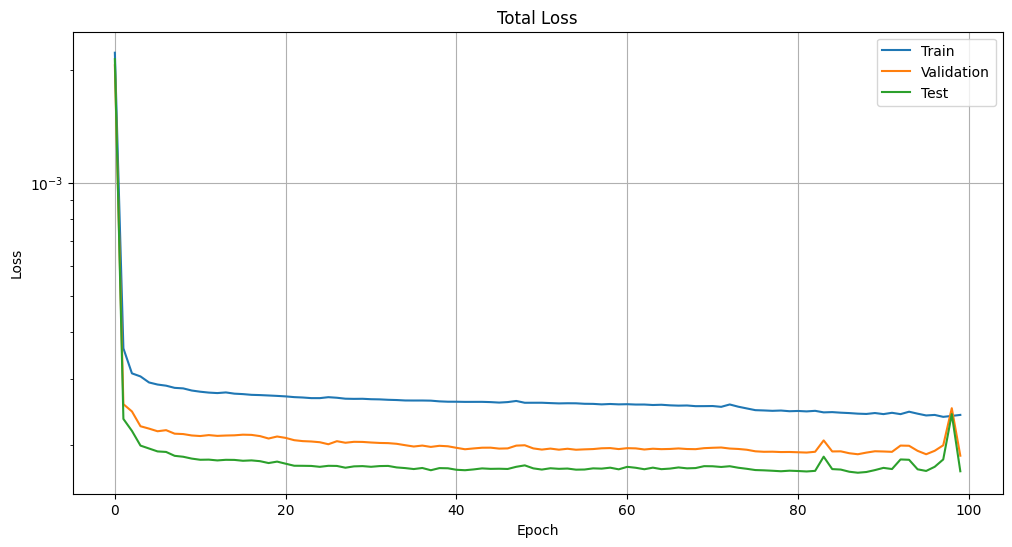

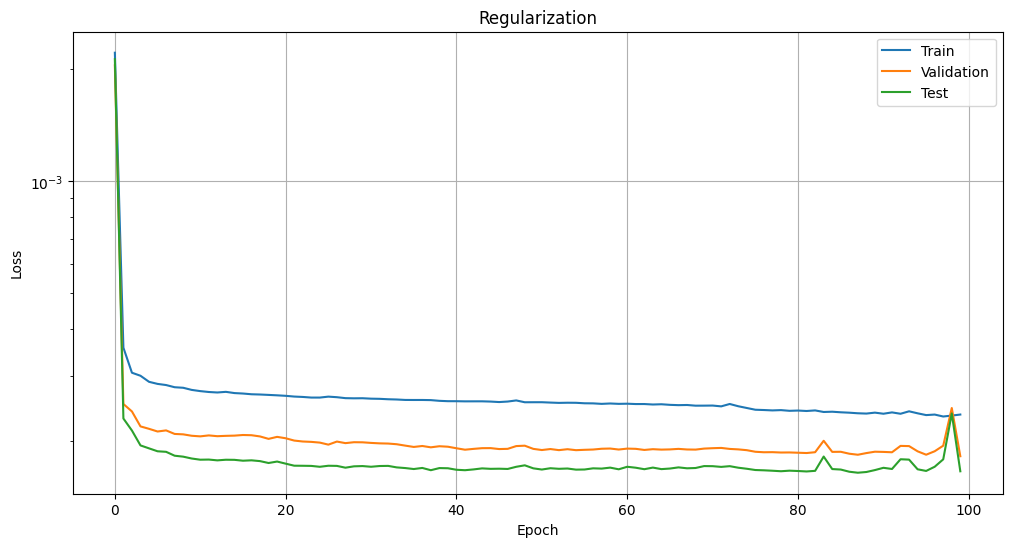

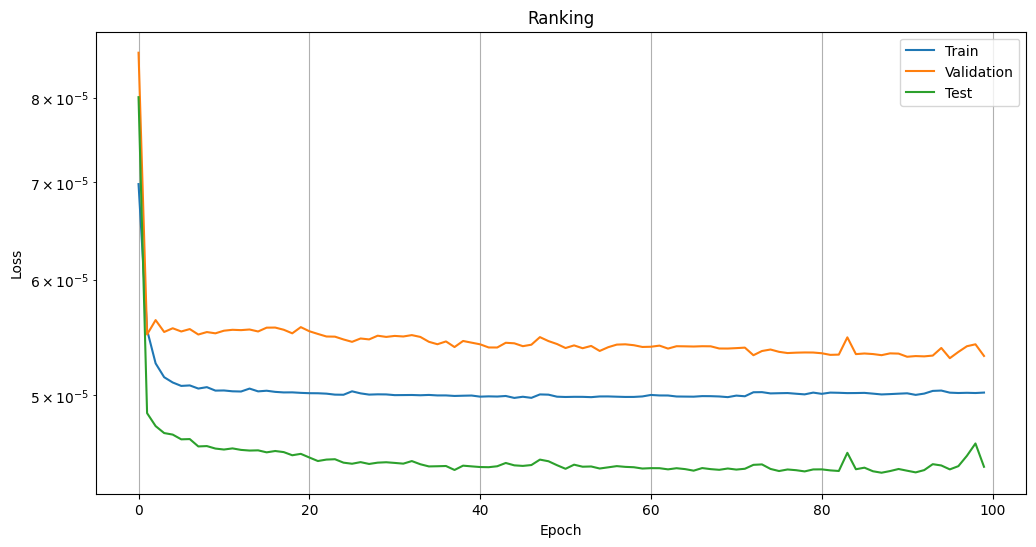

In [16]:
plot_history(
    train_loss=history['train_total_loss'],
    val_loss=history['val_total_loss'],
    test_loss=history['test_total_loss'],
    labels=["Train", "Validation", "Test"],
    title='Total Loss'
)

plot_history(
    train_loss=history['train_reg_loss'],
    val_loss=history['val_reg_loss'],
    test_loss=history['test_reg_loss'],
    labels=["Train", "Validation", "Test"],
    title='Regularization'
)

plot_history(
    train_loss=history['train_rank_loss'],
    val_loss=history['val_rank_loss'],
    test_loss=history['test_rank_loss'],
    labels=["Train", "Validation", "Test"],
    title='Ranking'
)

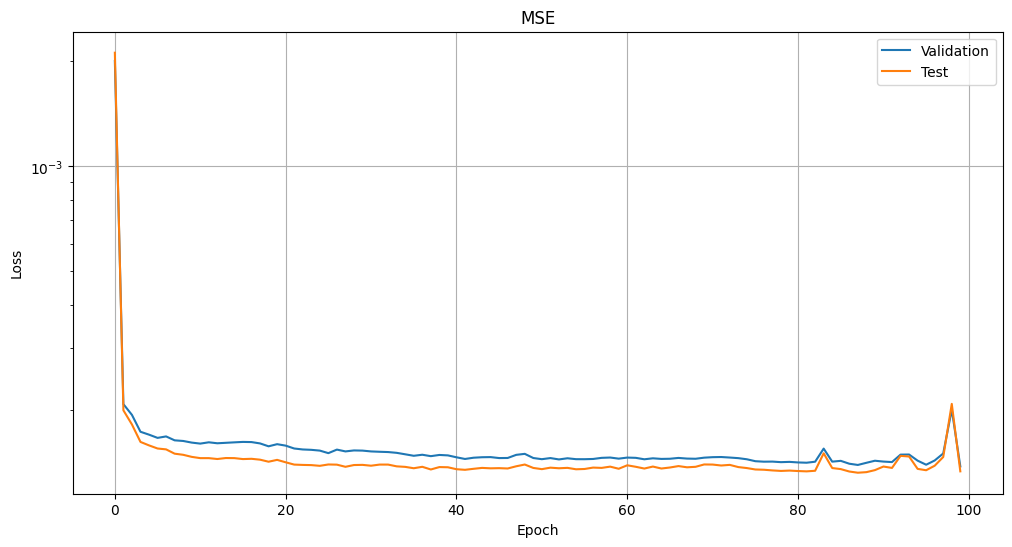

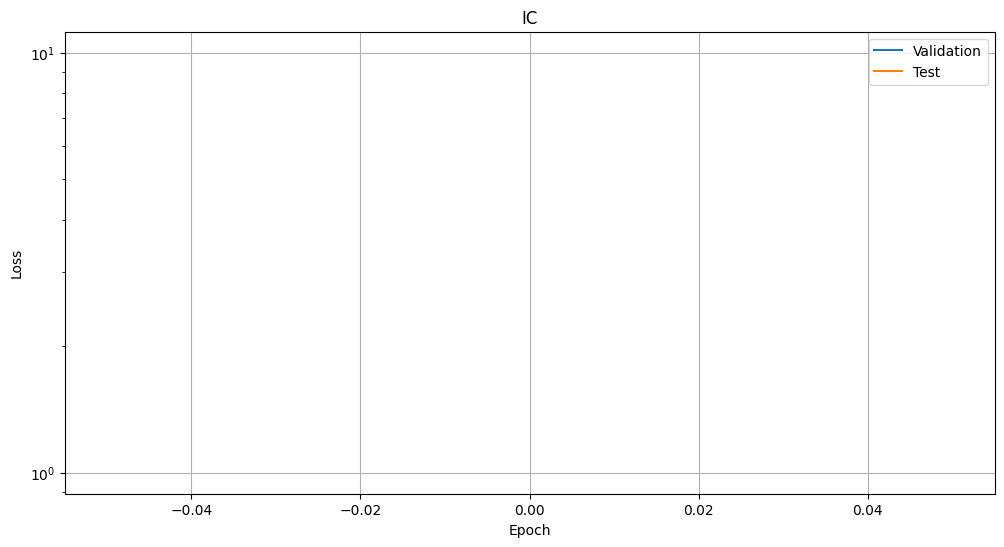

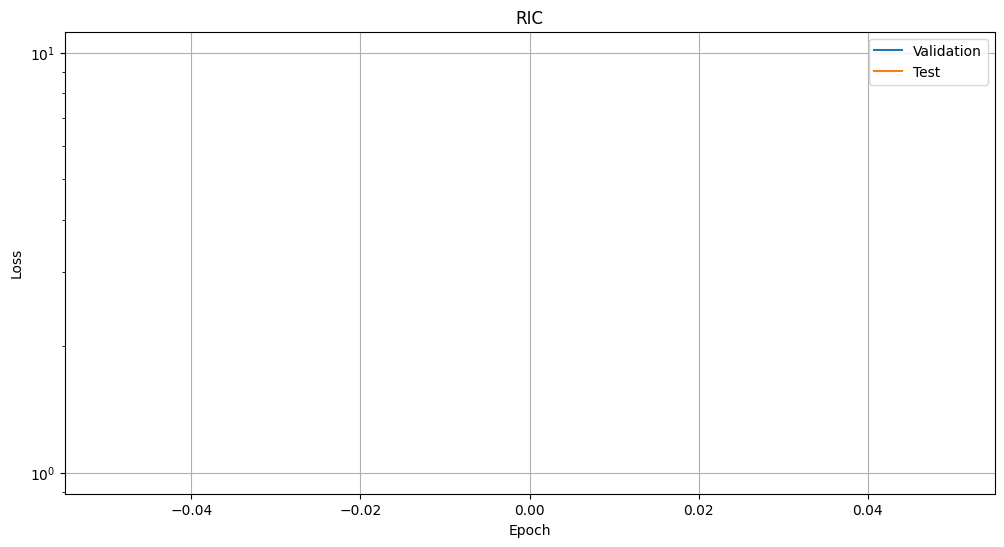

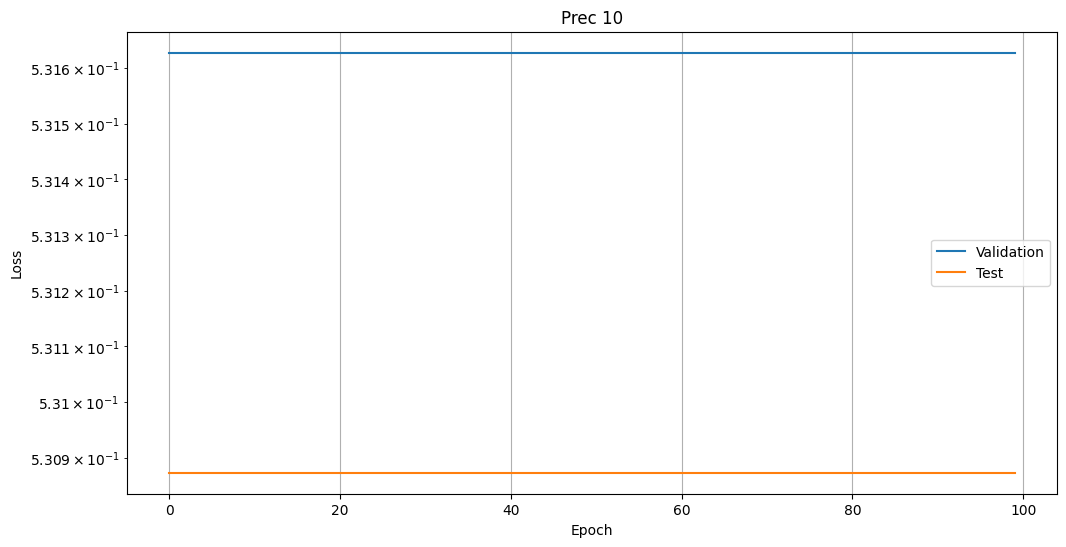

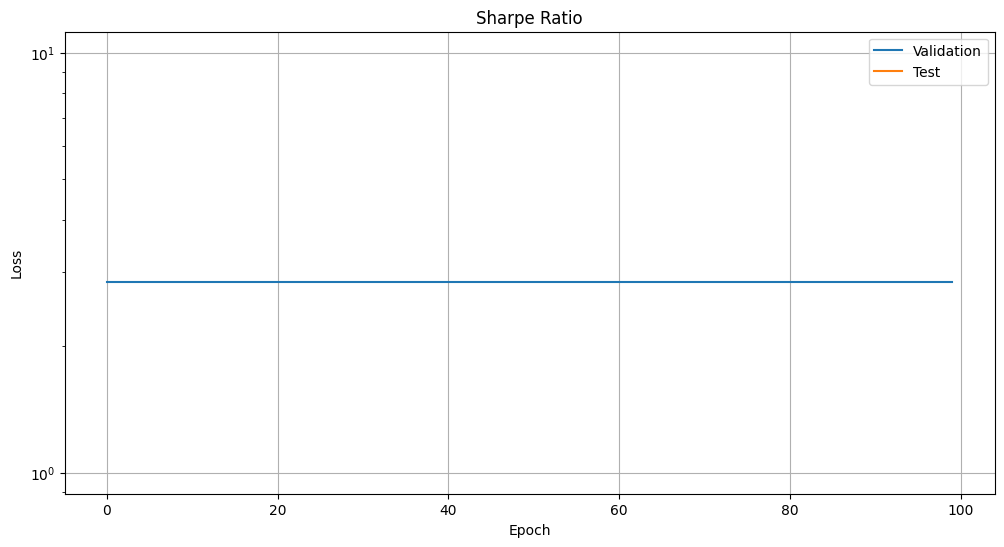

In [17]:
plot_history(
    train_loss=history['valid_mse'],
    val_loss=history['test_mse'],
    labels=["Validation", "Test"],
    title='MSE'
)

plot_history(
    train_loss=history['valid_ic'],
    val_loss=history['test_ic'],
    labels=["Validation", "Test"],
    title='IC'
)

plot_history(
    train_loss=history['valid_ric'],
    val_loss=history['test_ric'],
    labels=["Validation", "Test"],
    title='RIC'
)

plot_history(
    train_loss=history['valid_prec10'],
    val_loss=history['test_prec10'],
    labels=["Validation", "Test"],
    title='Prec 10'
)

plot_history(
    train_loss=history['valid_sr'],
    val_loss=history['test_sr'],
    labels=["Validation", "Test"],
    title='Sharpe Ratio'
)

In [32]:
import torch

torch.save(model.state_dict(), 'model/model_weights2.pth')
print("Model weights saved to 'model_weights.pth'")


Model weights saved to 'model_weights.pth'


In [45]:
import numpy as np
# Calculate the average of the last 5 epochs for each metric
n = -10
avg_metrics = {
    'avg_valid_mse': np.mean(history['valid_mse'][n:]),
    'avg_valid_ic': np.mean(history['valid_ic'][n:]),
    'avg_valid_ric': np.mean(history['valid_ric'][n:]),
    'avg_valid_prec10': np.mean(history['valid_prec10'][n:]),
    'avg_valid_sr': np.mean(history['valid_sr'][n:]),
    
    'avg_test_mse': np.mean(history['test_mse'][n:]),
    'avg_test_ic': np.mean(history['test_ic'][n:]),
    'avg_test_ric': np.mean(history['test_ric'][n:]),
    'avg_test_prec10': np.mean(history['test_prec10'][n:]),
    'avg_test_sr': np.mean(history['test_sr'][n:])
}

# Print the average metrics
for key, value in avg_metrics.items():
    print(f"{key}: {value:.5e}")


avg_valid_mse: 1.49497e-04
avg_valid_ic: nan
avg_valid_ric: nan
avg_valid_prec10: 5.31628e-01
avg_valid_sr: 2.83813e+00
avg_test_mse: 1.46433e-04
avg_test_ic: nan
avg_test_ric: nan
avg_test_prec10: 5.30873e-01
avg_test_sr: -3.83137e-01
